In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import seaborn as sns

import datetime
import time

## Choosing and Comparing CPU Refresh Rate Across All Setups

(array([0, 1, 2, 3]),
 [Text(0, 0, 'without CPU monitoring'),
  Text(1, 0, 'with CPU monitoring (every 1 second)'),
  Text(2, 0, 'with CPU monitoring (every 2 seconds)'),
  Text(3, 0, 'with CPU monitoring (every 3 seconds)')])

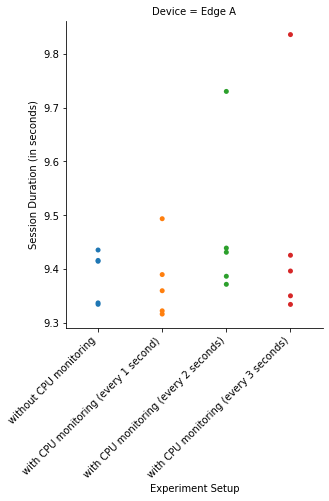

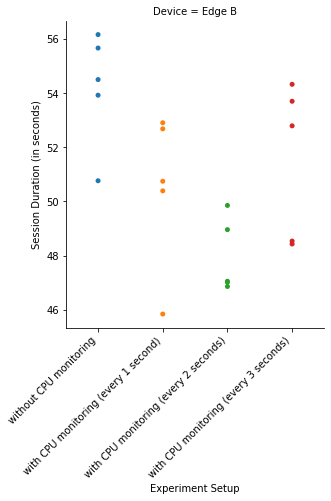

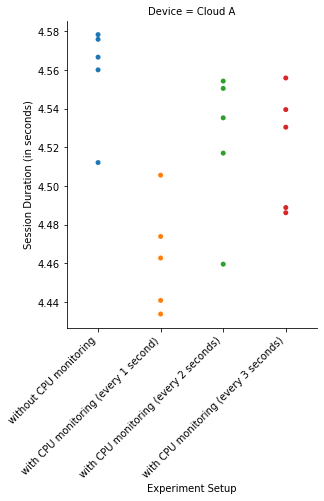

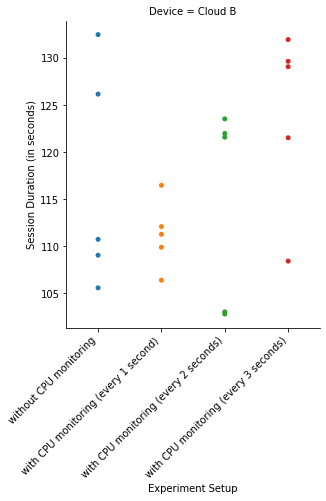

In [3]:
def ReadFile(filename,total):
    log_list = []
    i=0
    with open(filename) as reader:
        for line in reader:
            if (i==total):
                break
            line = line.strip()
            h,m,s = line.split(':')
            dur = 3600*int(h)+60*int(m)+float(s)
            log_list.append(dur)
            i+=1 
    return log_list

def ComputeDuration(mp_logs, device):
    session=[]
    type_exp=[]
    session_num=[]
    devices=[]
    for i in range(0,len(mp_logs[0][0])):
        for setup in range(0, len(mp_logs)):
            dur=0
            for num_process in range(0,len(mp_logs[0])):
                dur+=mp_logs[setup][num_process][i]
            session.append(dur)
            session_num.append(i+1)
            devices.append(device)
            if setup==0:
                type_exp.append('without CPU monitoring')
            elif setup==1:
                type_exp.append('with CPU monitoring (every 1 second)')
            elif setup==2:
                type_exp.append('with CPU monitoring (every 2 seconds)')
            elif setup==3:
                type_exp.append('with CPU monitoring (every 3 seconds)')
    data = {'Session Duration (in seconds)': session, 'Session': session_num, 'Experiment Setup': type_exp, 'Device': devices}
    df = pd.DataFrame(data, columns=['Session Duration (in seconds)', 'Session', 'Experiment Setup', 'Device'])
    return df

edge1_no=[ReadFile('cpu-testing/edge1/no/mp3_log',5),
          ReadFile('cpu-testing/edge1/no/mp4_log',5)]
edge1_1s=[ReadFile('cpu-testing/edge1/1s/mp3_log',5),
          ReadFile('cpu-testing/edge1/1s/mp4_log',5)]
edge1_2s=[ReadFile('cpu-testing/edge1/2s/mp3_log',5),
          ReadFile('cpu-testing/edge1/2s/mp4_log',5)]
edge1_3s=[ReadFile('cpu-testing/edge1/3s/mp3_log',5),
          ReadFile('cpu-testing/edge1/3s/mp4_log',5)]

edge2_no=[ReadFile('cpu-testing/edge2/no/mp3_log',5),
          ReadFile('cpu-testing/edge2/no/mp4_log',5)]
edge2_1s=[ReadFile('cpu-testing/edge2/1s/mp3_log',5),
          ReadFile('cpu-testing/edge2/1s/mp4_log',5)]
edge2_2s=[ReadFile('cpu-testing/edge2/2s/mp3_log',5),
          ReadFile('cpu-testing/edge2/2s/mp4_log',5)]
edge2_3s=[ReadFile('cpu-testing/edge2/3s/mp3_log',5),
          ReadFile('cpu-testing/edge2/3s/mp4_log',5)]

cloud1_no=[ReadFile('cpu-testing/cloud1/no/mp3_log',5),
          ReadFile('cpu-testing/cloud1/no/mp4_log',5),
          ReadFile('cpu-testing/cloud1/no/mp5_log',5)]
cloud1_1s=[ReadFile('cpu-testing/cloud1/1s/mp3_log',5),
          ReadFile('cpu-testing/cloud1/1s/mp4_log',5),
          ReadFile('cpu-testing/cloud1/1s/mp5_log',5)]
cloud1_2s=[ReadFile('cpu-testing/cloud1/2s/mp3_log',5),
          ReadFile('cpu-testing/cloud1/2s/mp4_log',5),
          ReadFile('cpu-testing/cloud1/2s/mp5_log',5)]
cloud1_3s=[ReadFile('cpu-testing/cloud1/3s/mp3_log',5),
          ReadFile('cpu-testing/cloud1/3s/mp4_log',5),
          ReadFile('cpu-testing/cloud1/3s/mp5_log',5)]

cloud2_no=[ReadFile('cpu-testing/cloud2/no/mp3_log',5),
          ReadFile('cpu-testing/cloud2/no/mp4_log',5),
          ReadFile('cpu-testing/cloud2/no/mp5_log',5)]
cloud2_1s=[ReadFile('cpu-testing/cloud2/1s/mp3_log',5),
          ReadFile('cpu-testing/cloud2/1s/mp4_log',5),
          ReadFile('cpu-testing/cloud2/1s/mp5_log',5)]
cloud2_2s=[ReadFile('cpu-testing/cloud2/2s/mp3_log',5),
          ReadFile('cpu-testing/cloud2/2s/mp4_log',5),
          ReadFile('cpu-testing/cloud2/2s/mp5_log',5)]
cloud2_3s=[ReadFile('cpu-testing/cloud2/3s/mp3_log',5),
          ReadFile('cpu-testing/cloud2/3s/mp4_log',5),
          ReadFile('cpu-testing/cloud2/3s/mp5_log',5)]


edge1_logs=[edge1_no, edge1_1s, edge1_2s, edge1_3s]
edge1_df = ComputeDuration(edge1_logs, 'Edge A')

edge2_logs=[edge2_no, edge2_1s, edge2_2s, edge2_3s]
edge2_df = ComputeDuration(edge2_logs, 'Edge B')

cloud1_logs=[cloud1_no, cloud1_1s, cloud1_2s, cloud1_3s]
cloud1_df = ComputeDuration(cloud1_logs, 'Cloud A')

cloud2_logs=[cloud2_no, cloud2_1s, cloud2_2s, cloud2_3s]
cloud2_df = ComputeDuration(cloud2_logs, 'Cloud B')

sns.catplot(x='Experiment Setup', y='Session Duration (in seconds)', data=edge1_df, col='Device',jitter=False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right'
)
sns.catplot(x='Experiment Setup', y='Session Duration (in seconds)', data=edge2_df, col='Device',jitter=False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right'
)
sns.catplot(x='Experiment Setup', y='Session Duration (in seconds)', data=cloud1_df, col='Device',jitter=False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right'
)
sns.catplot(x='Experiment Setup', y='Session Duration (in seconds)', data=cloud2_df, col='Device',jitter=False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right'
)